# Trabajo Practico 1

In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga de datos, indicando el tipo de dato se redujo de 71.3 Mb a 13.2 Mb
data_values = pd.read_csv('train_values.csv',dtype = {
    "geo_level_1_id" : "int16", 
    "geo_level_2_id" : "int16",
    "geo_level_3_id" : "int16",
    "count_floors_pre_eq" : "int8",
    "age" : "int16",
    "area_percentage" :"int16",
    "height_percentage" :"int16",
    "land_surface_condition" :"category",
    "foundation_type" :"category",
    "roof_type" :"category",
    "ground_floor_type" :"category",
    "other_floor_type" :"category",
    "position" :"category",
    "plan_configuration" :"category",
    "has_superstructure_adobe_mud" : "bool",
    "has_superstructure_mud_mortar_stone" : "bool",
    "has_superstructure_stone_flag" : "bool",
    "has_superstructure_cement_mortar_stone" : "bool",
    "has_superstructure_mud_mortar_brick" : "bool",
    "has_superstructure_cement_mortar_brick" : "bool",
    "has_superstructure_timber" : "bool",
    "has_superstructure_bamboo" : "bool",
    "has_superstructure_rc_non_engineered" : "bool",
    "has_superstructure_rc_engineered" : "bool",
    "has_superstructure_other" : "bool",
    "legal_ownership_status" :"category",
    "count_families" : "int16",
    "has_secondary_use" : "bool",
    "has_secondary_use_agriculture" : "bool",
    "has_secondary_use_hotel" : "bool",
    "has_secondary_use_rental" : "bool",
    "has_secondary_use_institution" : "bool",
    "has_secondary_use_school" : "bool",
    "has_secondary_use_industry" : "bool",
    "has_secondary_use_health_post" : "bool",
    "has_secondary_use_gov_office" : "bool",
    "has_secondary_use_use_police" : "bool",
    "has_secondary_use_other" : "bool"
                    
})

data_labels = pd.read_csv('train_labels.csv',dtype = {
    "damage_grade" : "category"    
})

In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int16   
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int16   
 7   height_percentage                       260601 non-null  int16   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [4]:
data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [64]:
data_values.describe(include="all")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,"260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00","260,601.00",260601,260601,...,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
unique,nan,nan,nan,nan,nan,nan,nan,nan,3,5,...,2,2,2,2,2,2,2,2,2,2
top,nan,nan,nan,nan,nan,nan,nan,nan,t,r,...,False,False,False,False,False,False,False,False,False,False
freq,nan,nan,nan,nan,nan,nan,nan,nan,216757,219196,...,243824,251838,258490,260356,260507,260322,260552,260563,260578,259267
mean,"525,675.48",13.90,701.07,"6,257.88",2.13,26.54,8.02,5.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"304,545.00",8.03,412.71,"3,646.37",0.73,73.57,4.39,1.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.00,0.00,0.00,0.00,1.00,0.00,1.00,2.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"261,190.00",7.00,350.00,"3,073.00",2.00,10.00,5.00,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"525,757.00",12.00,702.00,"6,270.00",2.00,15.00,7.00,5.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"789,762.00",21.00,"1,050.00","9,412.00",2.00,30.00,9.00,6.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


## Calculo porcentaje de tipo de daño de los edifcios

In [6]:
cantidad_edificios = data_labels["building_id"].count()
cantidad_edificios

260601

In [7]:
damage = data_labels.groupby(["damage_grade"]).count()
damage

,building_id
damage_grade,
1,25124
2,148259
3,87218


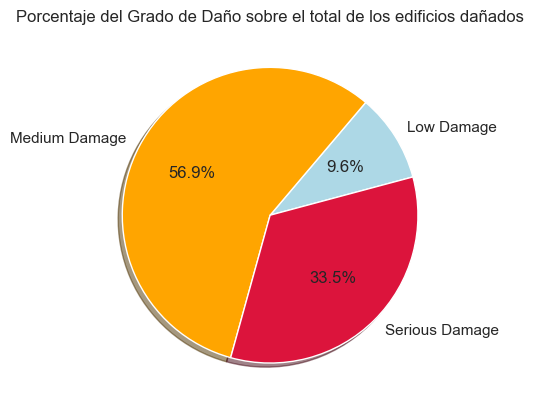

In [8]:
#Definir colores
my_colors = my_colors = ['lightblue','orange','crimson']

plt.pie(damage["building_id"].to_list(),
        labels = ["Low Damage" ,"Medium Damage","Serious Damage"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Porcentaje del Grado de Daño sobre el total de los edificios dañados")
plt.show()

## Mis columnas a estudiar

In [9]:
# Me quedo solo con los datos que me toca analizar
data_values_short = data_values.loc[:,["building_id",
                                       "geo_level_1_id",
                                       "geo_level_2_id",
                                       "geo_level_3_id",
                                       "count_floors_pre_eq",
                                       "age",
                                       "area_percentage",
                                       "height_percentage"
                                      ]]
data_values_short["cantidad"] = 1
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,cantidad
0,802906,6,487,12198,2,30,6,5,1
1,28830,8,900,2812,2,10,8,7,1
2,94947,21,363,8973,2,10,5,5,1
3,590882,22,418,10694,2,10,6,5,1
4,201944,11,131,1488,3,30,8,9,1
...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,1
260597,669485,17,715,2060,2,0,6,5,1
260598,602512,17,51,8163,3,55,6,7,1
260599,151409,26,39,1851,2,10,14,6,1


In [10]:
# Unifico data frames
data_values_short["damage_grade"] = data_labels["damage_grade"]
data_values_short

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,cantidad,damage_grade
0,802906,6,487,12198,2,30,6,5,1,3
1,28830,8,900,2812,2,10,8,7,1,2
2,94947,21,363,8973,2,10,5,5,1,3
3,590882,22,418,10694,2,10,6,5,1,2
4,201944,11,131,1488,3,30,8,9,1,3
...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,1,2
260597,669485,17,715,2060,2,0,6,5,1,3
260598,602512,17,51,8163,3,55,6,7,1,3
260599,151409,26,39,1851,2,10,14,6,1,2


## Por Edades

In [202]:
data_values_short["age"].describe()

count             260,601.00
mean                   26.54
std                    73.57
min                     0.00
25%                    10.00
50%                    15.00
75%                    30.00
max                   995.00
Name: age, dtype: float64

In [103]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadasEdad = dict(data_values_short["age"].value_counts().nlargest(20))
edad_mas_dañadas = sorted(list(top10MasDañadasEdad.keys()))


<AxesSubplot:title={'center':'Histograma Edad de Edificios Afectados'}, ylabel='Frequency'>

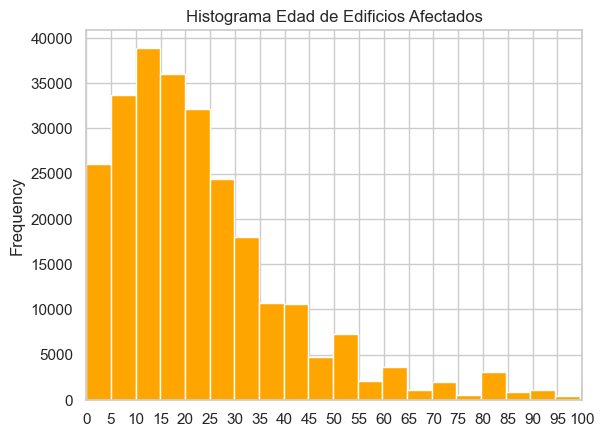

In [102]:
data_values_short["age"]\
.plot(kind = "hist",bins = 200,color='orange',\
      rwidth=1, xlim=(0,100),xticks=range(0,101,5),\
      title="Histograma Edad de Edificios Afectados")

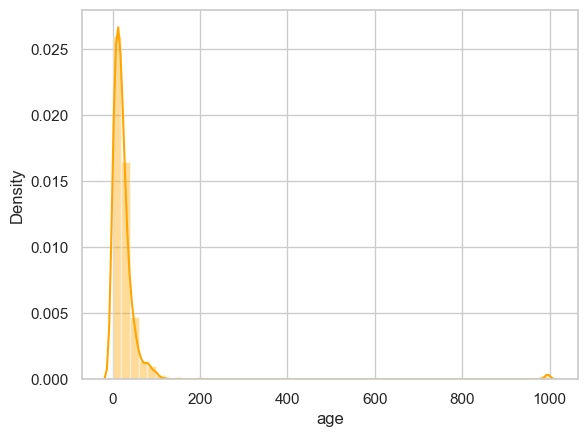

In [136]:
g = sns.distplot(data_values_short["age"],color = "orange")


In [58]:
daño_por_edad = data_values_short\
.groupby(["age","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_edad.reset_index(inplace = True)
daño_por_edad
    

,age,damage_grade,cantidad
0,0,1,7213
1,0,2,12721
2,0,3,6107
3,5,1,5590
4,5,2,19030
...,...,...,...
121,200,2,64
122,200,3,39
123,995,1,179
124,995,2,822


In [84]:
edad_low = []
edad_medium = []
edad_high = []
for i in range(0,len(daño_por_edad)):
    if daño_por_edad.loc[i,"age"] in edad_mas_dañadas:
        if (daño_por_edad.loc[i,"damage_grade"] == "1"):
            edad_low.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == "2"):
            edad_medium.append(daño_por_edad.loc[i,"cantidad"])
        elif (daño_por_edad.loc[i,"damage_grade"] == "3"):
            edad_high.append(daño_por_edad.loc[i,"cantidad"])

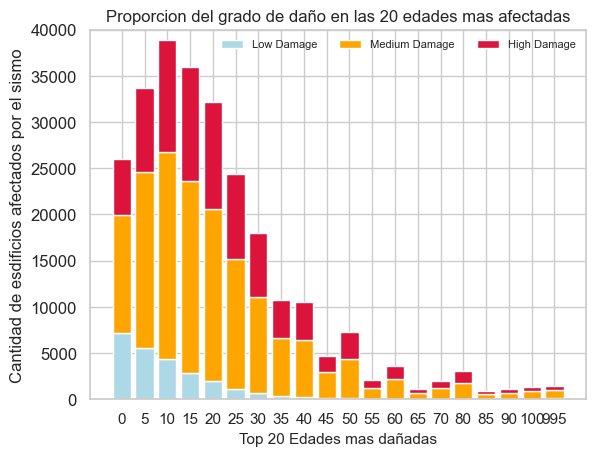

In [106]:
my_colors = ['lightblue','orange','crimson']
labels = ["0", "5", "10","15", "20", "25", "30", "35", "40", "45","50", "55", "60", "65", "70", "80", "85", "90", "100", "995"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [edad_low,edad_medium,edad_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,40000])
plt.title("Proporcion del grado de daño en las 20 edades mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 20 Edades mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

## Por ubicacion geografica

In [ ]:
data_values_short["geo_level_1_id"].describe()

In [15]:
# Analizo las 10 regiones con mayor cantidad de edificios dañados
top10MasDañadas = dict(data_values_short["geo_level_1_id"].value_counts().nlargest(10))
id_mas_dañadas = sorted(list(top10MasDañadas.keys()))
id_mas_dañadas

[4, 6, 7, 8, 10, 17, 20, 21, 26, 27]

In [166]:
list(top10MasDañadas.keys())

[6, 26, 10, 17, 8, 7, 20, 21, 4, 27]

<AxesSubplot:title={'center':'Histograma Regiones por id 1 mas Afectados'}, ylabel='Frequency'>

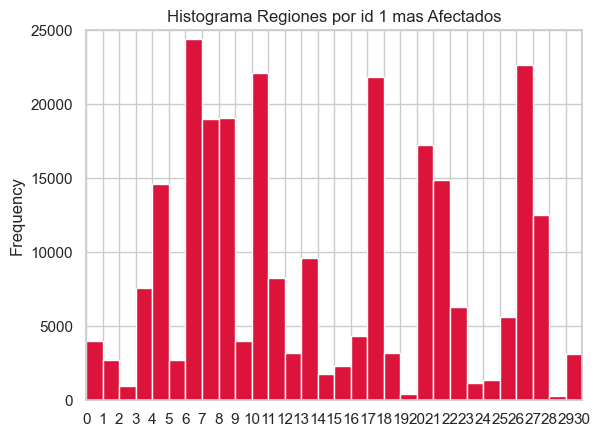

In [131]:
data_values_short["geo_level_1_id"].plot(kind = "hist",bins = 30,color='crimson',\
      rwidth=1, xlim=(0,30),ylim=(0,25000),xticks=range(0,31),\
      title="Histograma Regiones por id 1 mas Afectados")

In [14]:
daño_por_lugar = data_values_short\
.groupby(["geo_level_1_id","damage_grade"])\
.agg({"cantidad" : "count"})
daño_por_lugar.reset_index(inplace = True)
daño_por_lugar
    

,geo_level_1_id,damage_grade,cantidad
0,0,1,337
1,0,2,3075
2,0,3,599
3,1,1,411
4,1,2,1985
...,...,...,...
88,29,2,349
89,29,3,39
90,30,1,252
91,30,2,2127


In [16]:
id_low = []
id_medium = []
id_high = []
for i in range(0,len(daño_por_lugar)-1):
    if daño_por_lugar.loc[i,"geo_level_1_id"] in id_mas_dañadas:

        if (daño_por_lugar.loc[i,"damage_grade"] == "1"):
            id_low.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "2"):
            id_medium.append(daño_por_lugar.loc[i,"cantidad"])
        elif (daño_por_lugar.loc[i,"damage_grade"] == "3"):
            id_high.append(daño_por_lugar.loc[i,"cantidad"])

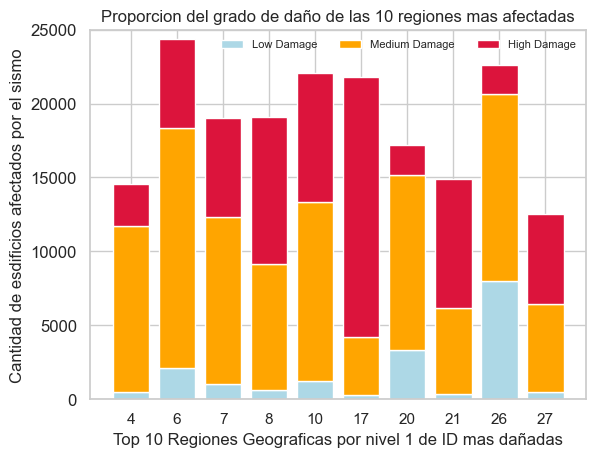

In [50]:
my_colors = ['lightblue','orange','crimson']
labels = ["4","6", "7", "8", "10", "17", "20", "21", "26", "27"]
header = ["Low Damage","Medium Damage","High Damage"]
dataset= [id_low,id_medium,id_high]

p1 = plt.bar(labels, dataset[0], color='lightblue',label = 'Low Damage')
p2 = plt.bar(labels, dataset[1], bottom=dataset[0], color='orange',label = 'Medium Damage')
p3 = plt.bar(labels, dataset[2], bottom= np.array(dataset[0])+np.array(dataset[1]), color='crimson',label = 'High Damage')

plt.ylim([0,25000])
plt.title("Proporcion del grado de daño de las 10 regiones mas afectadas",fontsize = 12)
plt.yticks(fontsize=12)
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.xlabel('Top 10 Regiones Geograficas por nivel 1 de ID mas dañadas', fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()


## Por cantidad de pisos

In [205]:
data_values_short["count_floors_pre_eq"].describe()

count             260,601.00
mean                    2.13
std                     0.73
min                     1.00
25%                     2.00
50%                     2.00
75%                     2.00
max                     9.00
Name: count_floors_pre_eq, dtype: float64

In [140]:
#Analizo porcentaje de daños por cantidad de pisos
daño_por_pisos = data_values_short.groupby(["count_floors_pre_eq","damage_grade"]).agg({"cantidad" : "count"})
daño_por_pisos.reset_index(inplace = True)


In [141]:
data_values_short["count_floors_pre_eq"].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

<AxesSubplot:title={'center':'Histograma Regiones por id 1 mas Afectados'}, ylabel='Frequency'>

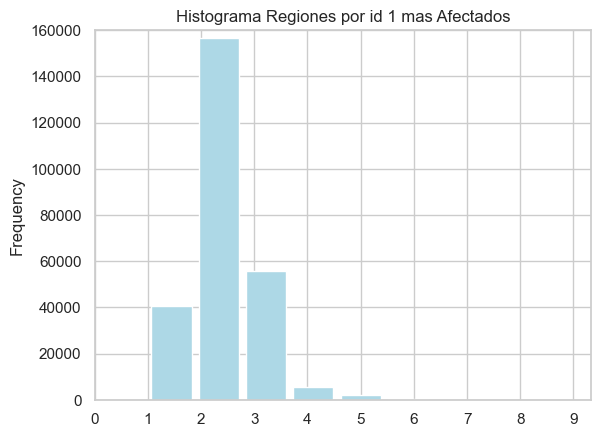

In [165]:
data_values_short["count_floors_pre_eq"].plot(kind = "hist",bins = 9,color='lightblue',\
      rwidth=0.85,ylim=(0,160000),xticks=range(0,10),\
      title="Histograma Regiones por id 1 mas Afectados")

Text(0.5, 1.0, 'Distribucion de los pisos de los edificios dañados en 4 regiones mas dañadas')

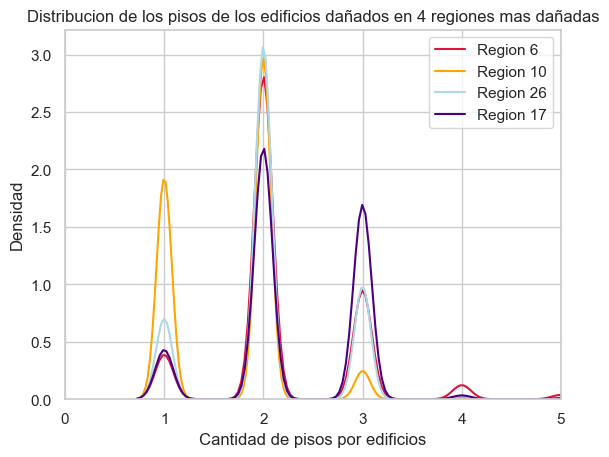

In [199]:
#Me quedo con las 5 regiones mas afectadas y veo distribucion de cantidad de pisos
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["count_floors_pre_eq"],color="crimson",hist = False,label= "Region 6")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["count_floors_pre_eq"],color="orange",hist = False,label= "Region 10")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["count_floors_pre_eq"],color="lightblue",hist = False,label= "Region 26")
g = sns.distplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["count_floors_pre_eq"],color="indigo",hist = False,label= "Region 17")
g.set(xlim=(0,5))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Cantidad de pisos por edificios")
g.set_title("Distribucion de los pisos de los edificios dañados en 4 regiones mas dañadas")

## Por altura del edificio

In [204]:
data_values_short["height_percentage"].describe()

count             260,601.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

In [ ]:
#Analizo porcentaje de daño por altura
daño_por_altura = data_values_short.groupby(["height_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_altura

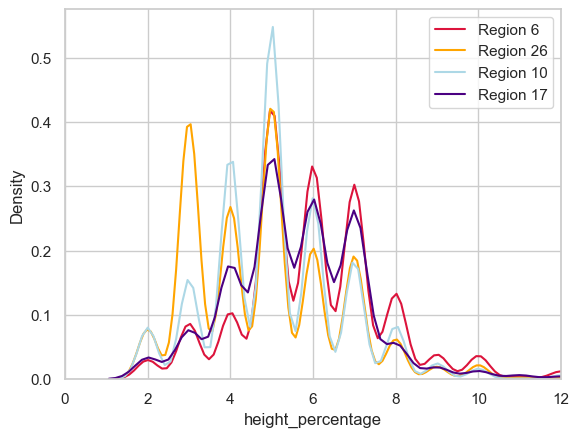

In [190]:
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["height_percentage"],color="crimson",label= "Region 6",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["height_percentage"],color="orange",label = "Region 26",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["height_percentage"],color="lightblue",label="Region 10",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["height_percentage"],color="indigo",label="Region 17",shade = False)
g.set(xlim=(0,12))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Altura del edificio")
g.set_title("Distribucion de la altura de los edificios dañados en 4 regiones mas dañadas")

## Por area del edificio 

In [203]:
data_values_short["area_percentage"].describe()

count             260,601.00
mean                    8.02
std                     4.39
min                     1.00
25%                     5.00
50%                     7.00
75%                     9.00
max                   100.00
Name: area_percentage, dtype: float64

In [ ]:
#Analizo porcentaje de daño por area
daño_por_area = data_values_short.groupby(["area_percentage","damage_grade"]).agg({"cantidad" : "count"})
daño_por_area

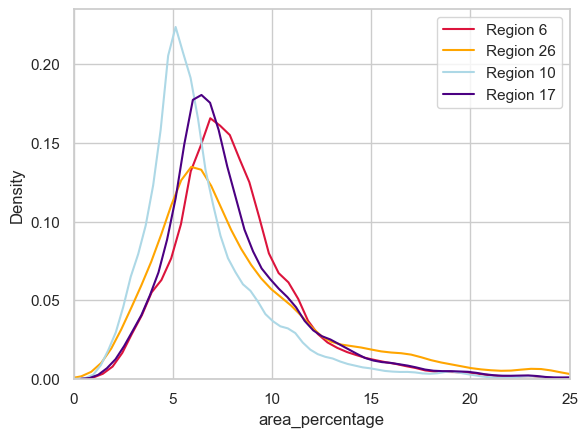

In [196]:
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 6]["area_percentage"],color="crimson",label= "Region 6",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 26]["area_percentage"],color="orange",label = "Region 26",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 10]["area_percentage"],color="lightblue",label="Region 10",shade = False)
g = sns.kdeplot(data_values_short[data_values_short["geo_level_1_id"] == 17]["area_percentage"],color="indigo",label="Region 17",shade = False)
g.set(xlim=(0,25))
plt.legend()
g.set_ylabel("Densidad")
g.set_xlabel("Area del edificio")
g.set_title("Distribucion del area de los edificios dañados en 4 regiones mas dañadas")

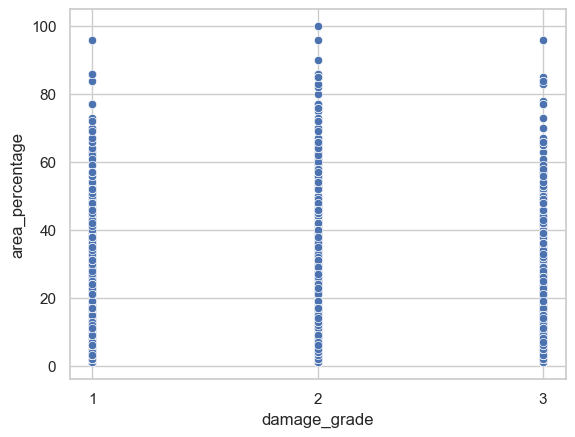

In [208]:
high_damage = data_values_short["damage_grade"]== 3
g = sns.scatterplot(y="area_percentage",x="damage_grade",data = data_values_short)


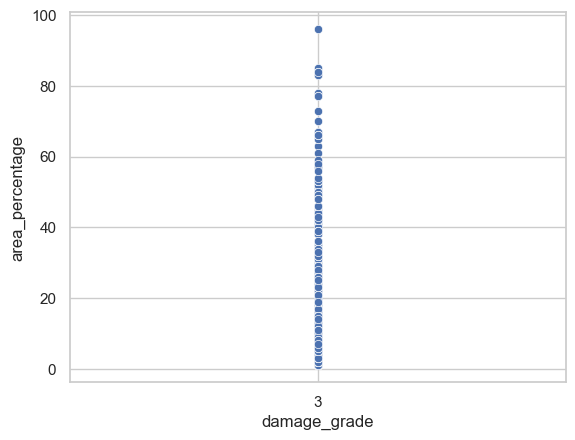

In [217]:
high_damage_filtered = data_values_short.loc[data_values_short["damage_grade"]=="3",["area_percentage","damage_grade"]]
g = sns.scatterplot(y="area_percentage",x="damage_grade",data = high_damage_filtered)